<a href="https://colab.research.google.com/github/shubham-bhadouria/Credit-Card-Default-Prediction/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [2]:
# installing libraries
!pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import klib
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE

from sklearn import svm
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
credit_card_df = pd.read_csv('/content/drive/MyDrive/Credit Card Default Prediction -- Shubham Bhadouria/Copy of default of credit card clients.csv', header=1)

# Dataset Overview

In [6]:
#Checking number of rows and columns in our dataset.
print(f' The number of rows are {credit_card_df.shape[0]}')
print(f' The number of columns are {credit_card_df.shape[1]}')

 The number of rows are 30000
 The number of columns are 25


In [7]:
#Name of columns that we have in our dataset 
credit_card_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
#view head of the dataset
credit_card_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
#view tail of the dataset
credit_card_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


# Looking for Duplicates and Missing Values

Last thing to check before moving on, is looking for duplicates and missing values in the dataset. We can use the is_null() function from Pandas to check for any missing data and then use the sum() function to see the total of missing values in each column.

In [10]:
# Checking for duplicate Values in the dataset
credit_card_df.duplicated().sum()

0

So, there are no duplicate values in our dataset.

In [11]:
#Checking the total null values in each feature
credit_card_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Thus, there are no missing values in our dataset.

Since our dataset has no duplicates and missing values, so we can move forward. If there a  missing value in the dataset then we can solve it by doing imputation or just remove the column altogether depending on the case.

## Descriptive Analysis

Generally, descriptive analyzes are the first manipulations performed in a quantitative study and their main objective is to summarize and explore the behavior of the data involved in the study.

In [12]:
# data information, It give us non-null values and data type of every column
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

No column has null values and each column is of integer type.

In [13]:
 #data information respect to different statistics
 credit_card_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Exploratary Data Analysis

Let's do Some Exploratary data analysis of our dataset and read our data closely to perform feature engineering.

**Using klib Python library for cleaning, analyzing and preprocessing**

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Note: The number of non binary numerical features is very large (23), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


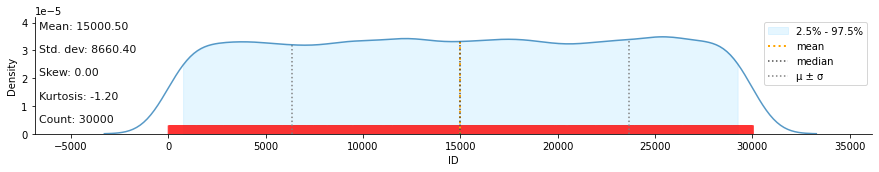

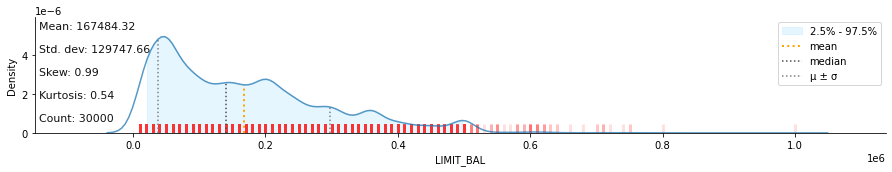

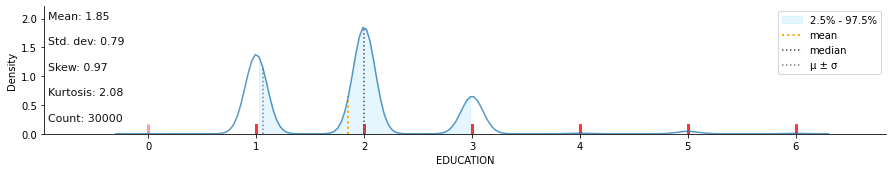

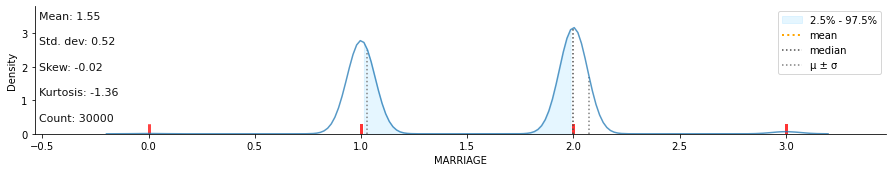

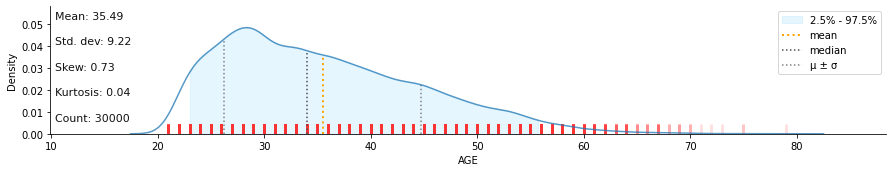

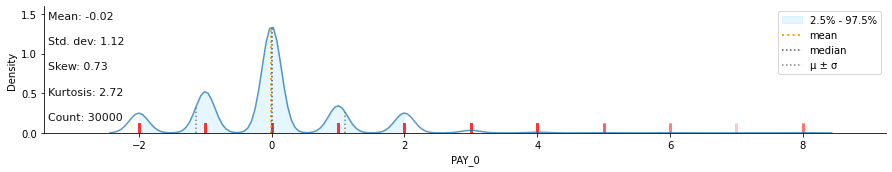

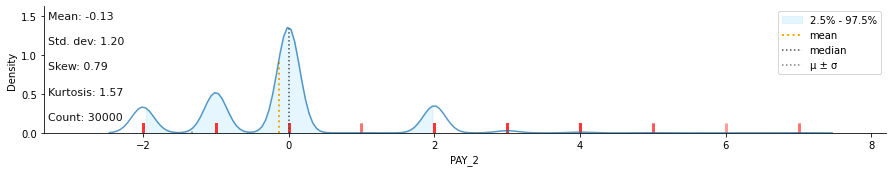

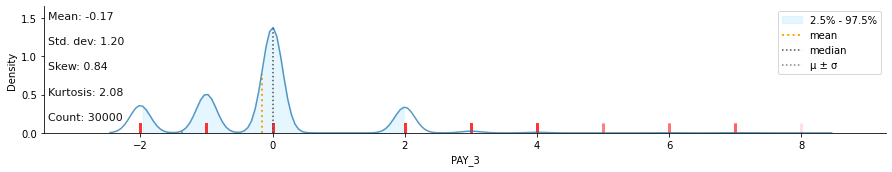

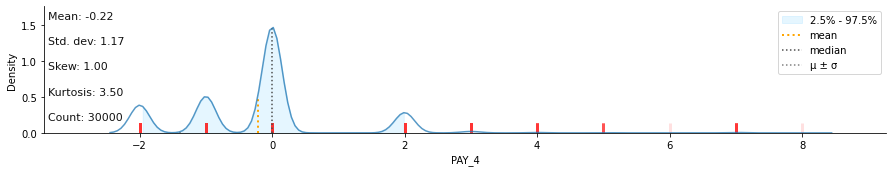

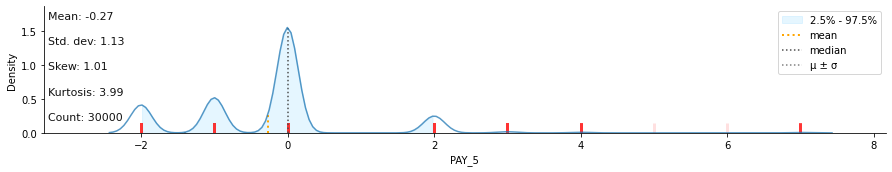

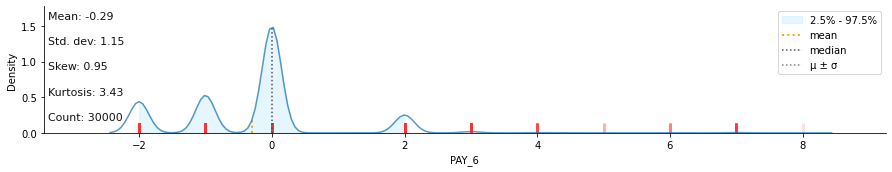

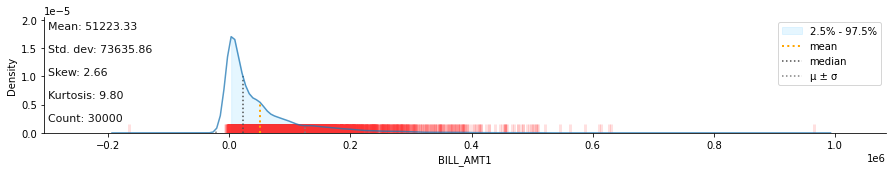

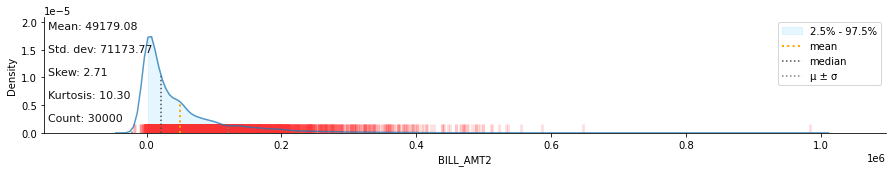

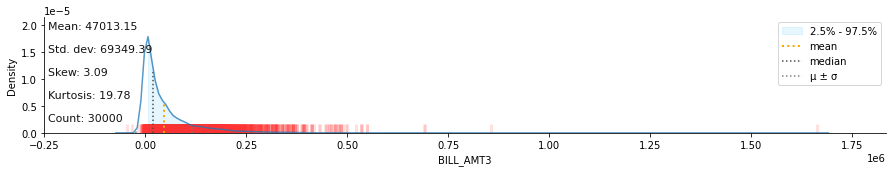

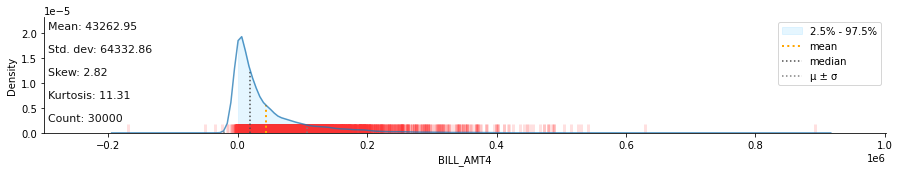

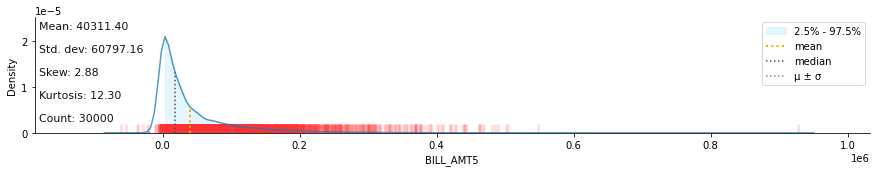

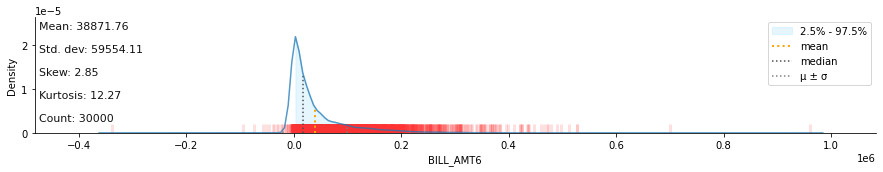

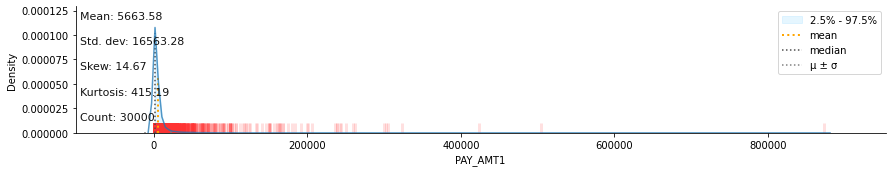

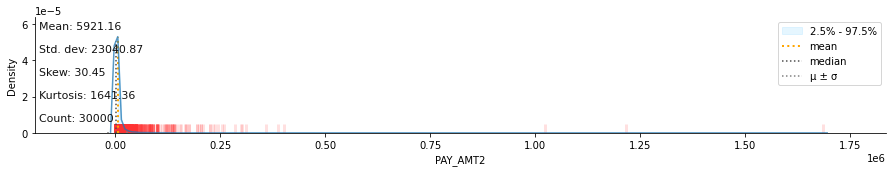

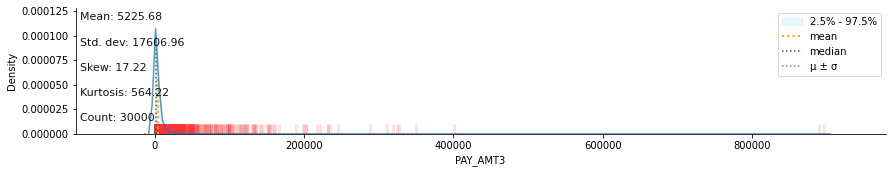

In [14]:
# default representation of a distribution plot
klib.dist_plot(credit_card_df)

**Inference :** The above plots are right skewed and except marriage all have outliers which should be removed.

# Target Class Distribution

Important thing to make sure before feeding our data into the model is the class distribution of the data. In our case target class is divided into two outcome, 0 and 1 where 0 represent 'non defaulter' and 1 represent 'defaulter'. A class distribution of 50:50 is considered ideal.

In [15]:
target = credit_card_df['default payment next month'].value_counts()   
target

0    23364
1     6636
Name: default payment next month, dtype: int64

**Inference:** There are total 23364 non-defaulters and 6636 defaulters in our dataset.

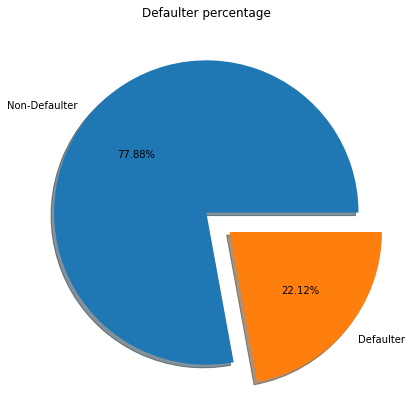

In [16]:
# Pie chart to decribe the distribution of target class.
plt.rcParams['figure.figsize']= (10,7)
plt.title("Defaulter percentage")
plt.pie(target,labels=['Non-Defaulter','Defaulter'],explode = [0,0.2],autopct='%1.2f%%', shadow= True)
plt.show()

**Inference :** Our target class has 77.88% non-defaulter and 22.12% defaulter in the dataset and target class distribution is not balance and has approximate 78:22 distribution.

# Independent Variables

Any variable that can be attributed a value without attributing a value to any other variable is called an independent variable.
Except target variable('default payment next month'), all the other variables are independent variables in our dataset.


In [17]:
# independent variables in the dataset
independent_variables = [col for col in credit_card_df.columns[0:-1]]
independent_variables

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

# 1. SEX

Here, 1 represent '***male***' and 2 represent '***female***'

In [18]:
# total number of person on the basis of gender
credit_card_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

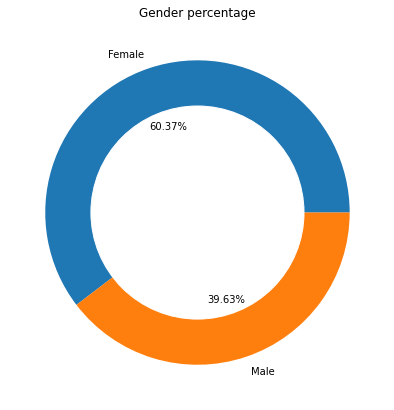

In [19]:
# Pie chart to decribe the gender of the person having credit card.
plt.rcParams['figure.figsize']= (10,7)
plt.title("Gender percentage")
plt.pie(credit_card_df['SEX'].value_counts(),labels=['Female', 'Male'],autopct='%1.2f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**Inference:** There are 39.63%(11888) males and 60.37%(18112) females in the dataset.

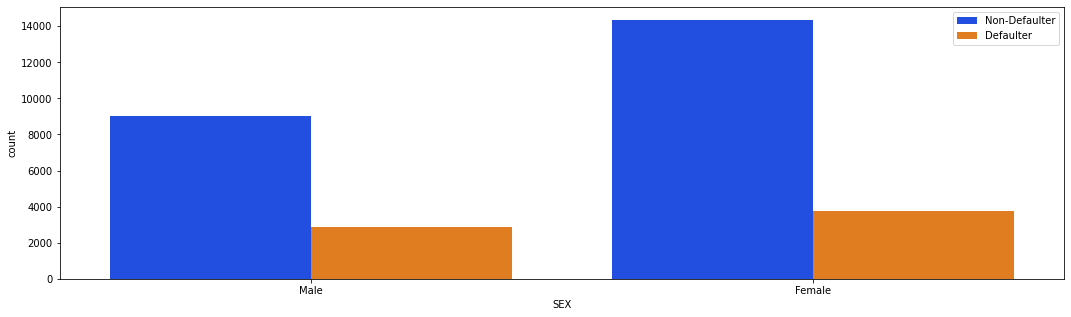

In [20]:
#Lets explore the count of defaulters and non-defaulters on the basis of gender
fig, ax = plt.subplots(figsize=(18, 5))
labels = ['Male', 'Female']
sns.countplot(credit_card_df['SEX'], hue=credit_card_df['default payment next month'],ax=ax, palette='bright').legend( ['Non-Defaulter','Defaulter'])
ax.xaxis.set_ticklabels(labels)
plt.show()

**Inference**: There is a huge variation in number of defaulters and non-defaulters in case of females while in case of men, this variation is very less as compared to females. 

# **2. Education**

Here, 1 represents ***'graduate school'***, 2 represents ***'university'***, 3 represents '***high school***' and 4 represents ***'others'***

In [21]:
# total count of person on the basis of their education level
credit_card_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Here, categories like [0,5 and 6] are unkmown so we will integrate these categories in category 4('others')

In [23]:
# Merging category 0,5 and 6 of column 'EDUCATION' in category 4 of same column
cat_merge_education = (credit_card_df['EDUCATION'] == 0) | (credit_card_df['EDUCATION'] == 5) | (credit_card_df['EDUCATION'] == 6)
credit_card_df.loc[cat_merge_education, 'EDUCATION'] = 4
credit_card_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

**Inference:** 14030 people are university pass out , 10585 are school graduate, 4917 are high school pass out and 468 belongs to others category.

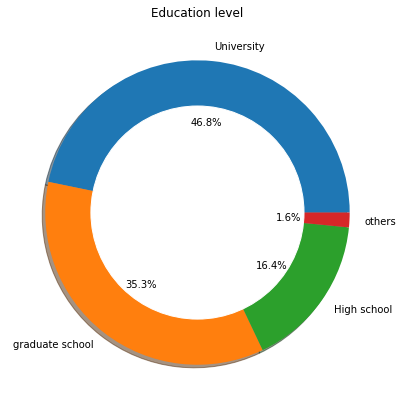

In [24]:
# Pie chart to decribe the gender of the person having credit card.
plt.rcParams['figure.figsize']= (10,7)
plt.title("Education level")
plt.pie(credit_card_df['EDUCATION'].value_counts(),labels=[ 'University','graduate school', 'High school','others'],autopct='%1.1f%%', shadow= True)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**Inference:** 46.8% people are university pass out , 35.3% are school graduate, 16.4% are high school pass out and 1.6% belongs to others category.

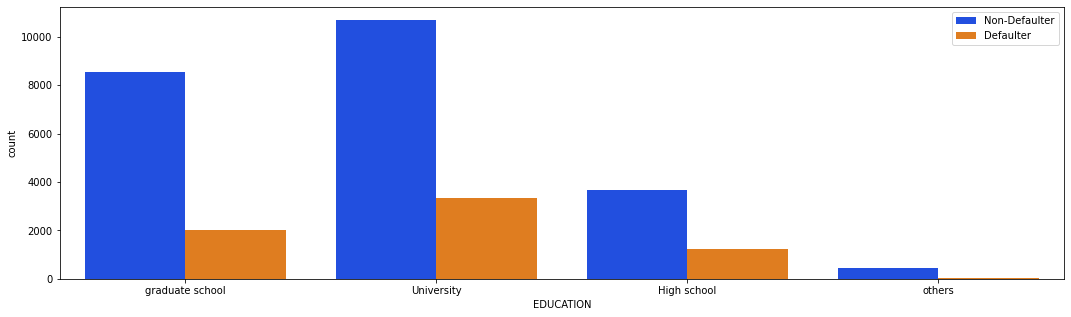

In [25]:
#Lets explore the count of defaulters and non-defaulters on the basis of education status
fig, ax = plt.subplots(figsize=(18, 5))
labels = ['graduate school','University', 'High school','others']
sns.countplot(credit_card_df['EDUCATION'], hue=credit_card_df['default payment next month'],ax=ax, palette='bright').legend( ['Non-Defaulter','Defaulter'])
ax.xaxis.set_ticklabels(labels)
plt.show()

**Inference:** Most of the defaulters are from university followed by graduate school, high school and others. variation of defaulters and non- defaulters is maximum in case of person has education level of university.

# 3. MARRIAGE 

Here, 1 represents ***'married'***, 2 represents ***'single'***  and 3 represents ***'others'***


In [26]:
# total number of person on the basis of gender
credit_card_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Here, category 0 is unkmown so we will merge this category in category 3('others')

In [27]:
# Merging category 0 of column 'MARRIAGE'in category 3 of same column
cat_merge_marriage = (credit_card_df['MARRIAGE'] == 0)
credit_card_df.loc[cat_merge_marriage, 'MARRIAGE'] = 3
credit_card_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

**Inference:** There are total 13659 married cardholders, 15964 bachler cardholders and 377 cardholders belongs to others category in our dataset.

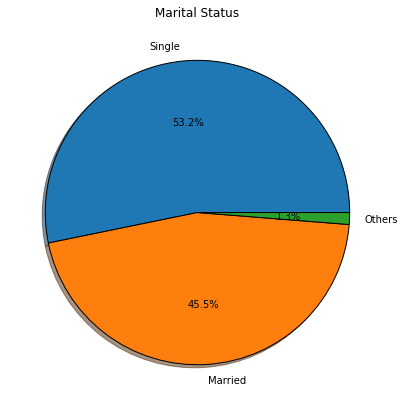

In [29]:
# Pie chart to decribe the marital status of the person having credit card.
plt.rcParams['figure.figsize']= (10,7)
plt.title("Marital Status")
plt.pie(credit_card_df['MARRIAGE'].value_counts(),labels=['Single','Married','Others'],autopct='%1.1f%%',shadow= True, wedgeprops={"edgecolor":"0",'linewidth': 1,
                    'linestyle': 'solid', 'antialiased': True})
plt.show()

Inference: There are total 45.5% married cardholders, 53.2% bachler cardholders and 1.3% cardholders belongs to others category in our dataset. 

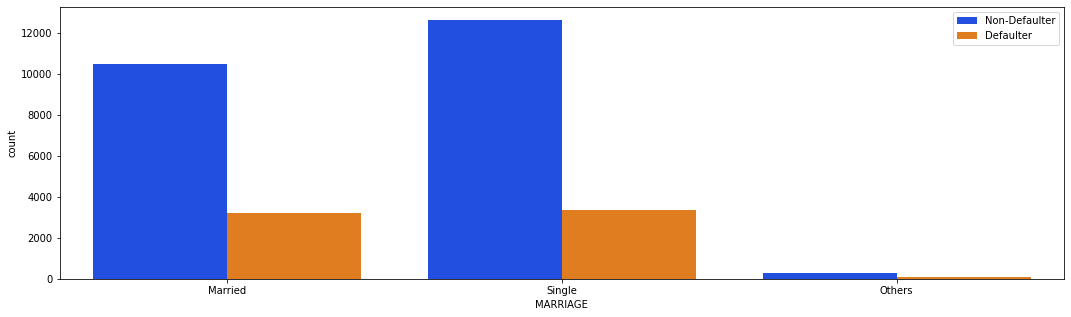

In [30]:
#Lets explore the count of defaulters and non-defaulters on the basis of marital status
fig, ax = plt.subplots(figsize=(18, 5))
labels = ['Married','Single','Others']
sns.countplot(credit_card_df['MARRIAGE'], hue=credit_card_df['default payment next month'],ax=ax, palette='bright').legend(['Non-Defaulter','Defaulter'])
ax.xaxis.set_ticklabels(labels)
plt.show()

**Inference:** Most of the singles are non-defaulters followed by married person. total number of defaulers in case of married and single are almost same.

# 4. AGE

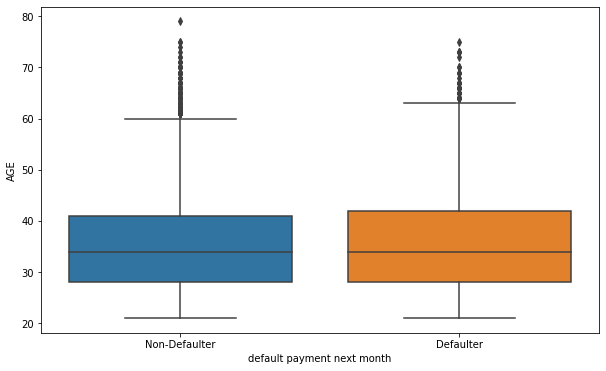

In [31]:
# Plotting the box plot for outliers
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y='AGE',x='default payment next month', data= credit_card_df)
ax.xaxis.set_ticklabels(['Non-Defaulter','Defaulter'])
plt.show()

**Inference:** From the above plot, it is clear that a majority of credit-card holders are of the age of 30s and 40s (28 to 42 years old fall within the 25th to 75th percentiles) and for each of the target variable the age feauture is not linearly seperable.Thus age will be of less importance to us.

# 5. BALANCE LIMIT

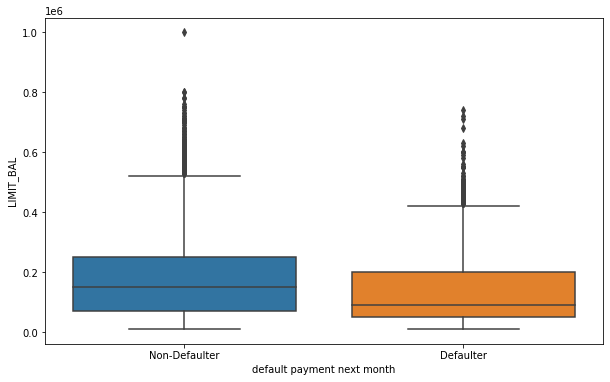

In [32]:
# Plotting the box plot for outliers
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y='LIMIT_BAL',x='default payment next month', data= credit_card_df)
ax.xaxis.set_ticklabels(['Non-Defaulter','Defaulter'])
plt.show()

**Inference:** Most of the defaulter has the balance limit in the range 50000 to 200000.

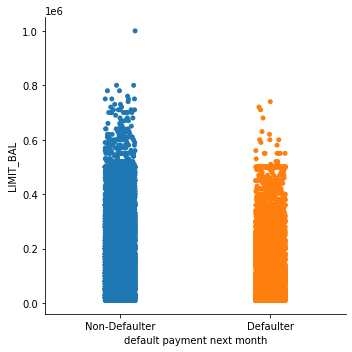

In [43]:
##Lets explore the count of defaulters and non-defaulters on the basis of balance limit
sns.catplot(x='default payment next month', y='LIMIT_BAL', data=credit_card_df).set_xticklabels(['Non-Defaulter','Defaulter'])
plt.show()

**Inference:** It can be seen that more the amount limit, more the chances of non-defaulter.

In [44]:
#Let's rename the columns related to the capital
credit_card_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
credit_card_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
credit_card_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

# Different months Bill details

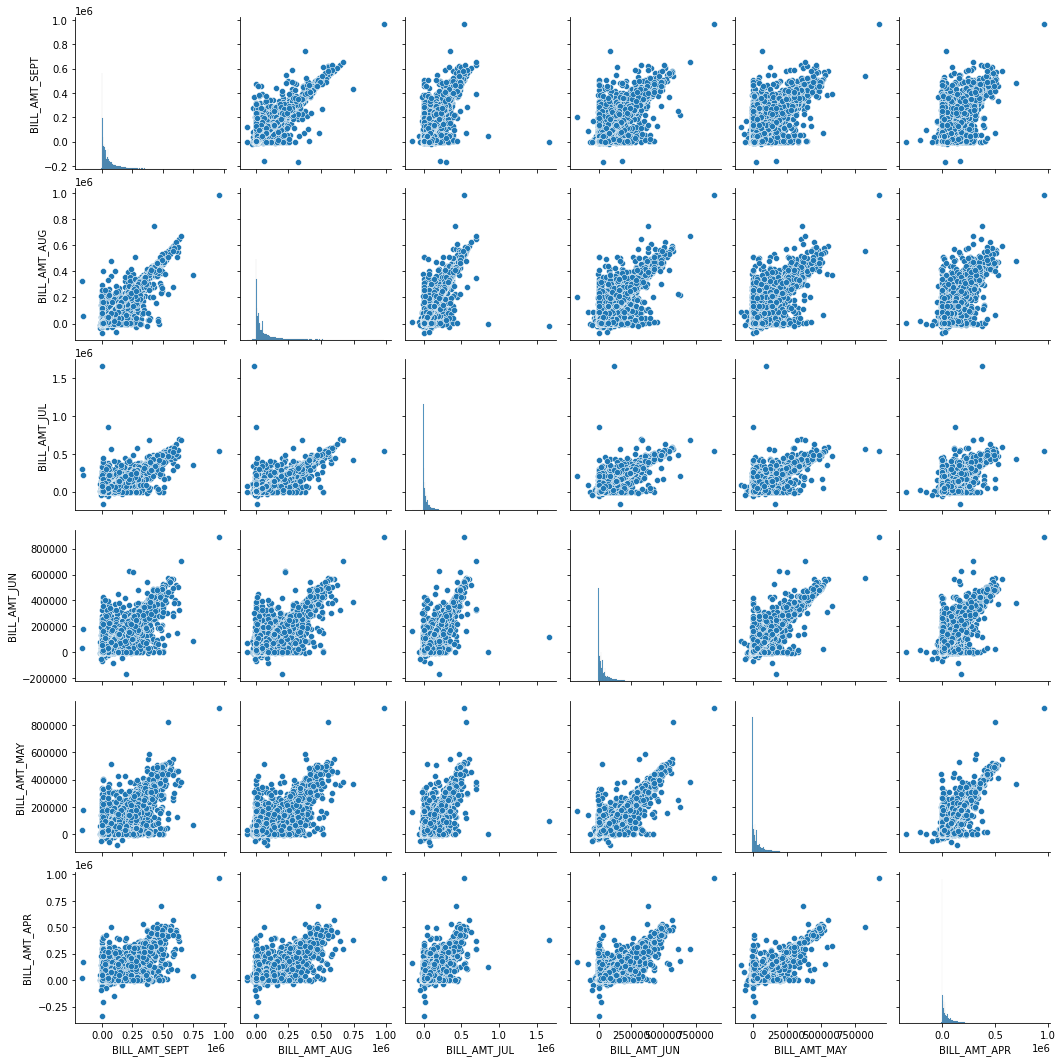

In [51]:
#Let's draw a pair plot between bill amount of various months
sns.pairplot(data=credit_card_df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']])

**Inference:** There is almost no pattern between  bill amount of various months columns.



# Different months Payment Delay details

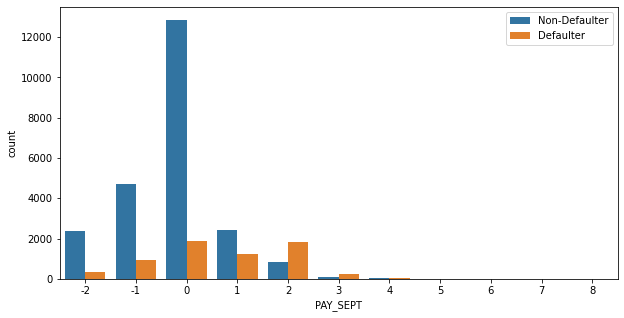

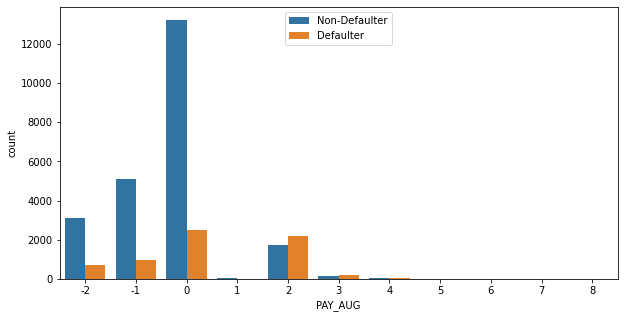

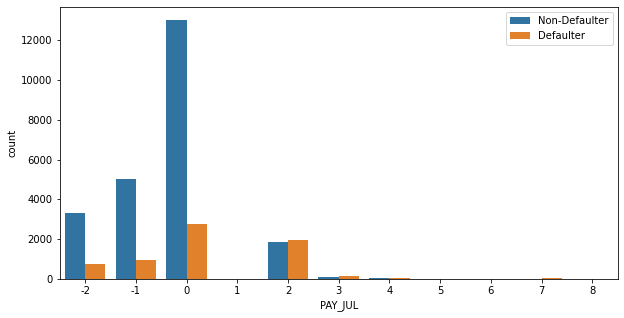

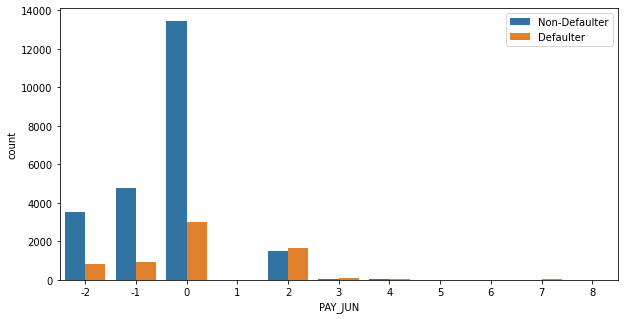

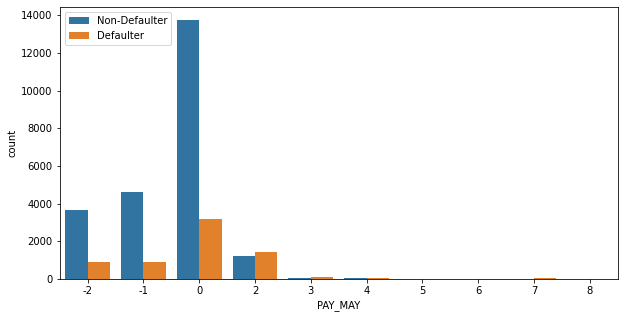

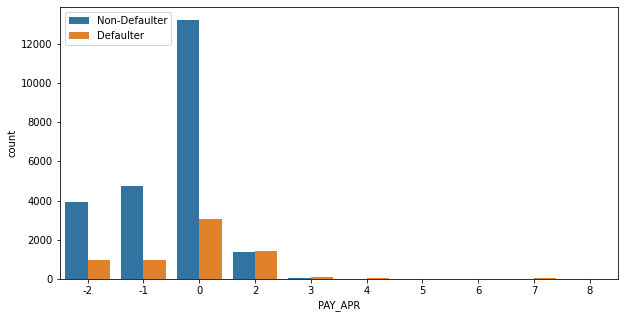

In [50]:
 #Let's draw a count plot for payment delay of various months
pay_amount_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_amount_col:
  plt.rcParams['figure.figsize']= (10,5)
  sns.countplot(x = col, hue = 'default payment next month', data = credit_card_df).legend(['Non-Defaulter','Defaulter'])
  plt.show()

**Inference:** After careful observation on the payment delay for the respective month we found that most credit card payment did by the customer.we see the distribution of the plot peak at 0.

# Amount Paid in Different Months

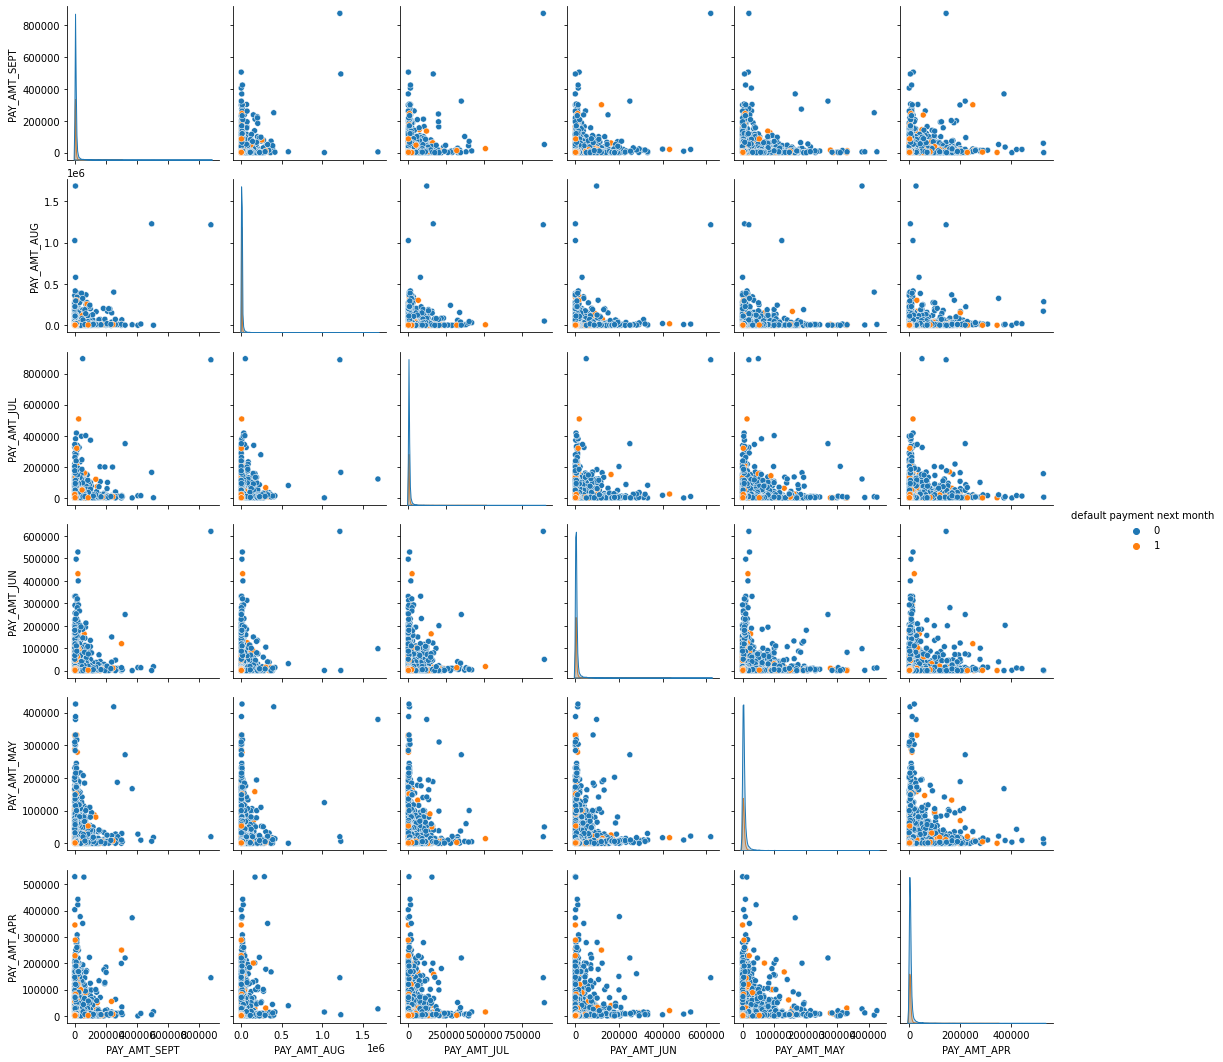

In [56]:
#Let's draw a pair plot between amount paid in various months
sns.pairplot(data=credit_card_df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR','default payment next month']], hue = 'default payment next month')

**Inference:** There is almost no pattern between bill amount of various months columns.

# Multivariate Scatter Plot
After performing above univariate analysis we tried to dig deep into the data to see the relation between multiple features with others of same data types. 

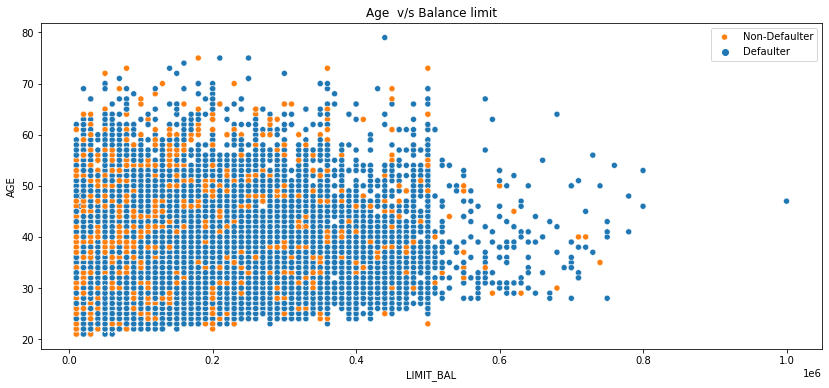

In [63]:
#Lets try to find some more insights 
plt.figure(figsize=(14,6))
sns.scatterplot(x= credit_card_df.LIMIT_BAL, y= credit_card_df.AGE, hue = credit_card_df['default payment next month']).legend(['Non-Defaulter','Defaulter'])
plt.title('Age  v/s Balance limit')
plt.show()

**Inference**- Above scatter plot is depicting that most of the credit card holder falls balance limit less than 500000.

# Strip Plot between balance limit and  sex, education and marriage columns

<Figure size 1008x432 with 0 Axes>

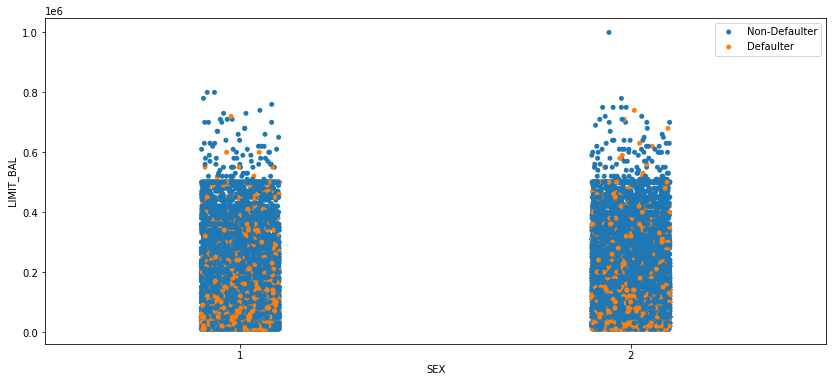

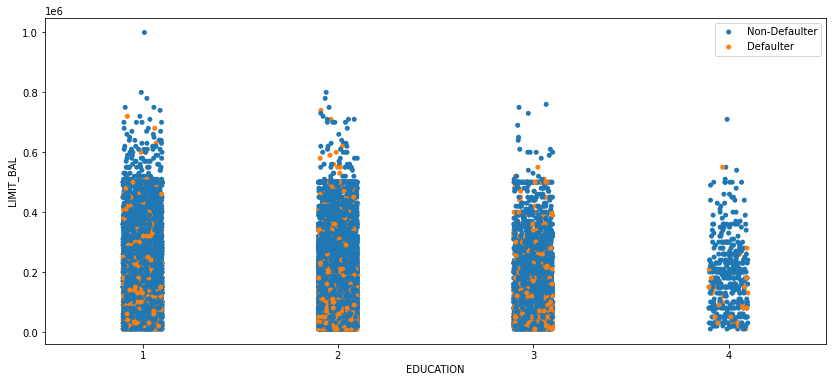

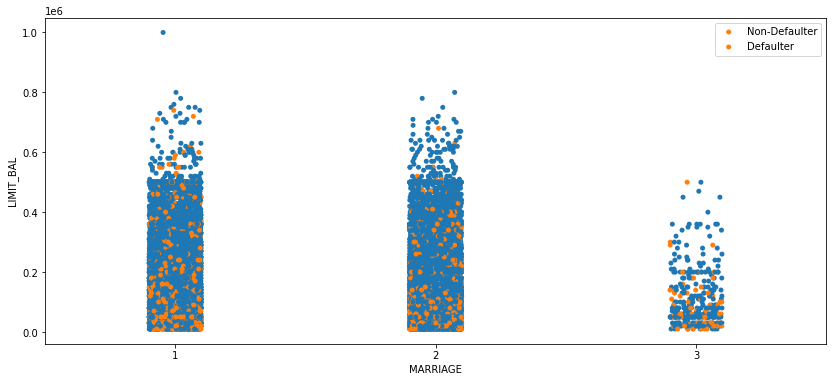

In [69]:
plt.figure(figsize=(14,6))
for col in ['SEX','EDUCATION','MARRIAGE']:
  plt.figure(figsize=(14,6))
  sns.stripplot(x= col, y='LIMIT_BAL', hue='default payment next month', data=credit_card_df).legend(['Non-Defaulter','Defaulter'])
  plt.show()

The above striplots helped in distinguishing each feature for defaulters and non-defaulters and analyzing them for feature engineering.